# Elastic Net Regression in Vectorized/ Matrix Form from scratch in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from sklearn.metrics import mean_squared_error

In [2]:
train=pd.read_csv('/home/atul/Downloads/train.csv')
test=pd.read_csv('/home/atul/Downloads/test1.csv')

In [3]:
train.head() #1st 5 rows of train

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
test.head() #1st 5 rows of tests

,AT,V,AP,RH,PE
0,8.67,40.77,1011.81,89.40,479.23
1,10.53,37.50,1008.55,99.91,472.32
2,7.99,41.38,1021.95,78.77,487.57
3,22.29,45.01,1012.40,51.58,449.08
4,9.06,36.30,1015.14,58.71,477.38


# Algorithms

#### Variables:
error_thres = Error Threshold  
maxi = max. no. of iterations   
s = step size or learning rate  
theta = parameter array(to learn) ,here Initialized with all zeros; can be random values as well between 0 and 1  
J = cost Function    
Jval = list of error values  
m = no. of training examples  
lbda = regularization coefficient  
Y = Dependent/Predicted Variable  
alpha = mix-up proportion coefficient

In [5]:
def elasticNetRegression(error_thres,maxi,s,lbda,alpha):
    Jval=[]
    theta=np.zeros(5)
    for i in range(maxi):
        Y=theta.dot(X)
        J=((1/(2*m))*np.sum(np.square(Y-yTrainTarget))+lbda*(((1-alpha)/2)*np.sum(np.square(theta))+alpha*np.sum(theta)))
        Jval.append(J)
        if(J<error_thres and (len(Jval)>10 and np.mean(Jval[-10:])==Jval[-1])):
            break
        else:
            theta=gradientDescent(X,yTrainTarget,theta.T,s,lbda,alpha).T
    return(theta, Jval)

In [6]:
def gradientDescent(A,B,theta,s,lbda,alpha):
        theta=theta-((s/m)*(((theta.T.dot(A))-B).dot(A.T)).T+lbda*(1-alpha)*theta+lbda*alpha)
        return(theta)

# Training

In [7]:
m=len(train) #no. of training examples
m

299

## Converting Train Data Frames in matrix form

In [8]:
trd=train.T 
m=len(train)
X=np.array([trd.iloc[0].values,trd.iloc[1].values,trd.iloc[2].values,trd.iloc[3].values,np.ones(m)])
X

array([[8.34000e+00, 2.36400e+01, 2.97400e+01, ..., 3.05900e+01,
        1.40400e+01, 1.54700e+01],
       [4.07700e+01, 5.84900e+01, 5.69000e+01, ..., 7.00400e+01,
        4.87900e+01, 4.49000e+01],
       [1.01084e+03, 1.01140e+03, 1.00715e+03, ..., 1.01028e+03,
        1.01762e+03, 1.02159e+03],
       [9.00100e+01, 7.42000e+01, 4.19100e+01, ..., 5.05600e+01,
        7.52500e+01, 8.17400e+01],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]])

## True target values

In [9]:
yTrainTarget=trd.iloc[4].values
yTrainTarget 

array([480.48, 445.75, 438.76, 453.09, 464.43, 470.96, 442.35, 464.  ,
       428.77, 484.31, 435.29, 451.41, 426.25, 480.66, 460.17, 453.13,
       461.71, 471.08, 473.74, 448.56, 464.82, 427.28, 441.76, 474.71,
       467.21, 487.69, 438.67, 485.66, 452.16, 429.87, 468.82, 442.85,
       483.26, 433.59, 433.04, 458.6 , 435.14, 443.2 , 477.9 , 445.26,
       435.57, 447.42, 462.28, 441.81, 454.16, 437.24, 464.11, 440.89,
       485.2 , 445.34, 440.  , 431.35, 456.32, 432.98, 429.41, 464.95,
       481.91, 437.15, 462.6 , 432.43, 442.22, 441.03, 468.91, 432.46,
       430.07, 437.78, 483.12, 462.19, 457.71, 438.32, 434.35, 427.05,
       448.69, 475.88, 479.28, 446.85, 434.99, 441.5 , 433.26, 430.46,
       455.14, 431.26, 437.76, 464.63, 462.58, 483.27, 438.51, 431.03,
       484.  , 431.64, 451.78, 439.46, 467.23, 459.81, 447.15, 442.  ,
       449.61, 481.28, 437.54, 475.52, 458.68, 436.76, 446.08, 474.35,
       481.96, 479.66, 435.28, 434.86, 435.72, 454.14, 455.76, 442.83,
      

### Learnt parameter values

In [10]:
theta, Jval= elasticNetRegression(0.001,1000,0.0000001,0.0001,0.5)
theta

array([-0.05006285, -0.03934648,  0.4506902 , -0.00373775, -0.04828179])

Text(0, 0.5, 'Error or Cost Function')

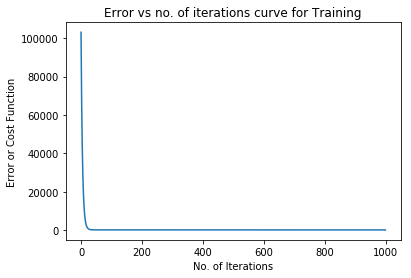

In [11]:
pt.plot(range(len(Jval)),Jval)
pt.title('Error vs no. of iterations curve for Training')
pt.xlabel('No. of Iterations')
pt.ylabel('Error or Cost Function')

In [12]:
yPredTrain = theta.dot(X)
yPredTrain

array([453.16928851, 452.01758756, 449.98002365, 450.69905801,
       455.8083661 , 455.31909966, 450.14443022, 457.88749697,
       450.82439703, 456.51978962, 449.12934245, 453.83699324,
       451.12544799, 452.5332966 , 455.63538061, 456.28247212,
       453.62615624, 457.20117793, 456.81431003, 448.62799541,
       454.36888974, 448.40868545, 451.43040131, 459.17242041,
       456.70150264, 460.13992032, 451.90326707, 456.48437282,
       452.27846911, 453.50684758, 445.36225994, 452.6412394 ,
       457.68760731, 453.10883793, 449.84061272, 458.5076116 ,
       449.01575701, 454.35211172, 456.4856922 , 454.9249758 ,
       449.02102361, 450.48501814, 455.49881871, 453.3288032 ,
       453.24673183, 450.9325192 , 450.03781001, 448.38173879,
       455.77891773, 450.53553056, 451.75204942, 452.81226676,
       455.84567949, 447.71067393, 450.48374407, 450.69072059,
       452.01452139, 451.74454287, 453.68591394, 447.45269444,
       451.13504899, 453.05607755, 455.17867831, 450.10

### Root Mean Squared Error for Train

In [13]:
np.sqrt(mean_squared_error(yTrainTarget,yPredTrain.T))

15.29478892063971

# Testing

## Preparing Test Data

In [14]:
tsd=test.T 
m=len(test)
Xtest=np.array([tsd.iloc[0].values,tsd.iloc[1].values,tsd.iloc[2].values,tsd.iloc[3].values,np.ones(m)])
Xtest.shape

(5, 200)

In [15]:
yTestTarget=tsd.iloc[4].values
yTestTarget 

array([479.23, 472.32, 487.57, 449.08, 477.38, 474.16, 454.25, 429.85,
       462.98, 434.04, 470.84, 488.65, 473.94, 437.42, 457.12, 457.49,
       443.41, 445.27, 436.74, 487.33, 434.43, 437.14, 439.96, 442.58,
       436.88, 441.94, 438.62, 470.55, 441.76, 450.88, 482.89, 454.41,
       479.15, 458.67, 446.91, 466.52, 444.16, 489.09, 475.01, 471.43,
       455.24, 445.49, 430.56, 471.78, 443.15, 475.  , 474.22, 445.71,
       491.29, 437.87, 467.44, 437.14, 448.24, 447.2 , 478.12, 465.44,
       445.65, 437.4 , 455.66, 445.83, 449.36, 436.26, 452.99, 431.72,
       481.83, 433.08, 446.87, 463.03, 440.77, 430.91, 445.93, 430.34,
       462.46, 460.08, 441.76, 449.66, 436.38, 452.07, 467.35, 473.87,
       460.7 , 479.53, 467.46, 440.27, 454.32, 442.48, 435.76, 439.56,
       467.  , 462.6 , 472.16, 448.46, 434.11, 449.74, 439.29, 473.2 ,
       437.62, 491.49, 495.23, 442.75, 480.74, 461.38, 461.74, 489.54,
       477.61, 461.49, 474.93, 447.89, 481.02, 470.68, 440.92, 453.38,
      

## Applying Learned theta values from Trained model on test data to predict values

In [16]:
yPredTest = theta.dot(Xtest)
yPredTest

array([453.5922173 , 452.11922955, 458.21198964, 453.15080108,
       455.36408149, 454.09022914, 453.05013294, 448.2557955 ,
       455.8587109 , 449.93972609, 456.6008689 , 460.89520196,
       457.9891873 , 452.15961977, 455.17269488, 459.48892488,
       449.81172303, 454.26353566, 451.35818661, 457.60045348,
       448.73284596, 452.31936495, 452.74565861, 450.59734528,
       448.92480775, 451.38865555, 450.61208347, 452.7389378 ,
       448.84183379, 453.88469006, 454.21810078, 456.97890709,
       456.67890554, 454.24888612, 454.04334492, 457.62118311,
       450.31886096, 453.75727627, 457.22547104, 457.99796878,
       456.17156386, 450.86708989, 446.46584312, 459.53248469,
       451.27248227, 457.18954872, 456.31169696, 450.0975681 ,
       454.24037053, 452.34072442, 453.7462161 , 449.74701921,
       450.28800347, 449.979453  , 461.55502396, 456.17287863,
       451.29566164, 450.3364292 , 453.13990605, 452.4267993 ,
       455.89542008, 452.27539277, 453.93284251, 449.73

### Root Mean Squared Error for Test

In [17]:
np.sqrt(mean_squared_error(yTestTarget,yPredTest.T))

14.993549521792213